# Graphs and Graph Neural Networks Workshop

Welcome to the  Graphs and Graph Neural Networks Workshop

**Lecturer info:**
- Milan Petrović, PhD student
- Faculty of Informatics and Digital Technologies
- milan.petrovic@uniri.hr


**Goals of this workshop:**
- Demonstration of working with Python module NetworkX
- Get to know the basics of graphs (complex networks)
- Show ways of analyzing graphs and applying algorithms

**After this workshop you will know:**
- Basics of using Python and the NetworkX for data analysis and visualization.




In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms.community.centrality import girvan_newman

import numpy as np
import pandas as pd

**Basic terminology**

| Network Science | Graph Theory |
| --------------- | ------------ |
| Network | Graph |
| Node | Vertex |
| Link | Edge |



In [6]:
group = ["James", "Mary", "Robert", "Patricia", "John", "Jennifer", "Lisa", "Peter"]

friendship = [("James", "Mary"),
              ("Mary", "Patricia"),
              ("John", "Jennifer"),
              ("James", "Jennifer"),
              ("Mary","Jennifer"),
              ("Patricia", "John"),
              ("John","Robert"),
              ("Peter","John"),
              ("Lisa", "Peter"),
              ("Robert", "Peter"),
              ("Lisa", "John")]

In [7]:
G = nx.Graph()
G.add_nodes_from(group)
G.add_edges_from(friendship)

In [ ]:
G.nodes()

NodeView(('James', 'Mary', 'Robert', 'Patricia', 'John', 'Jennifer', 'Lisa', 'Peter'))

In [ ]:
G.edges()

EdgeView([('James', 'Mary'), ('James', 'Jennifer'), ('Mary', 'Patricia'), ('Mary', 'Jennifer'), ('Robert', 'John'), ('Robert', 'Peter'), ('Patricia', 'John'), ('John', 'Jennifer'), ('John', 'Peter'), ('John', 'Lisa'), ('Lisa', 'Peter')])

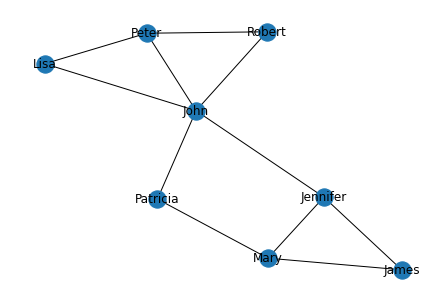

In [ ]:
nx.draw(G) #with_labels = True

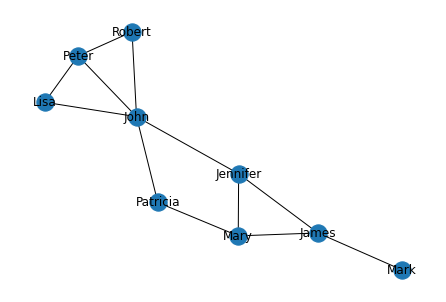

In [ ]:
G.add_node("Mark")
G.add_edge("Mark", "James")

nx.draw(G, with_labels = True)

In [ ]:
G.nodes["Mark"]["icecream"] = "Chocholate"

In [ ]:
G.nodes["Mark"]

{'icecream': 'Chocholate'}

In [ ]:
G.add_node("Paul", icecream="Vanilla")

In [ ]:
list(G.nodes(data=True))

[('James', {}),
 ('Mary', {}),
 ('Robert', {}),
 ('Patricia', {}),
 ('John', {}),
 ('Jennifer', {}),
 ('Lisa', {}),
 ('Peter', {}),
 ('Mark', {'icecream': 'Chocholate'}),
 ('Paul', {'icecream': 'Vanilla'})]

In [12]:
G.add_edge("Paul", "John", weight=5, time="12:00")

In [ ]:
G["Paul"]["John"]

{'weight': 5, 'time': '12:00'}

## Directed graph

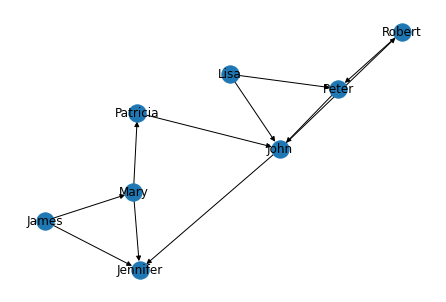

In [17]:
group = ["James", "Mary", "Robert", "Patricia", "John", "Jennifer", "Lisa", "Peter"]

friendship = [("James", "Mary"),
              ("Mary", "Patricia"),
              ("John", "Jennifer"),
              ("James", "Jennifer"),
              ("Mary","Jennifer"),
              ("Patricia", "John"),
              ("John","Robert"),
              ("Peter","John"),
              ("Lisa", "Peter"),
              ("Robert", "Peter"),
              ("Lisa", "John")]

DG = nx.DiGraph()
DG.add_nodes_from(group)
DG.add_edges_from(friendship)

nx.draw(DG, with_labels = True)

## Exercise: Building a Graph

Build an undirected graph with 10 nodes named as integers from 1 to 10.

Create attribute **type** which is even or odd based on node.

Add edges between nodes. Your graph should have at least 15 edges. 

Plot your graph

Display node atributes

## Network Analysis


## Degree
The degree of a node it's the number of incident edges to that node.

- undirected graphs it'is equal to their number of neighbors.

- directed graphs we have to distinguish between incoming edges and ougoing edges, and we have to distinguish between in-degree and out-degree

{'James': 2,
 'Mary': 3,
 'Robert': 2,
 'Patricia': 2,
 'John': 6,
 'Jennifer': 3,
 'Lisa': 2,
 'Peter': 3,
 'Paul': 1}

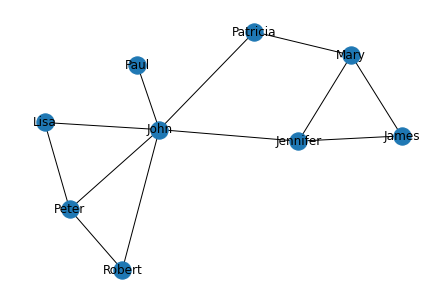

In [18]:
nx.draw(G, with_labels=True)
dict(G.degree())

In [9]:
G.degree("Peter")

3

In [10]:
list(G.neighbors("Peter"))

['John', 'Lisa', 'Robert']

In [15]:
G["John"]

AtlasView({'Jennifer': {}, 'Patricia': {}, 'Robert': {}, 'Peter': {}, 'Lisa': {}, 'Paul': {'weight': 5, 'time': '12:00'}})

## Degree in directed graphs

{'James': 2,
 'Mary': 3,
 'Robert': 2,
 'Patricia': 2,
 'John': 5,
 'Jennifer': 3,
 'Lisa': 2,
 'Peter': 3}

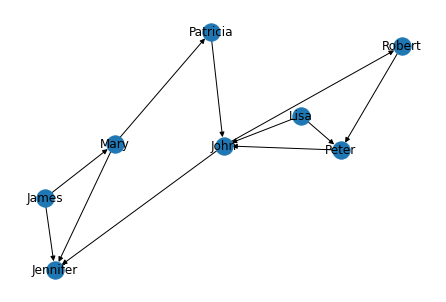

In [19]:
nx.draw(DG, with_labels=True)
dict(DG.degree())

In [20]:
dict(DG.in_degree())

{'James': 0,
 'Mary': 1,
 'Robert': 1,
 'Patricia': 1,
 'John': 3,
 'Jennifer': 3,
 'Lisa': 0,
 'Peter': 2}

In [22]:
dict(DG.out_degree())

{'James': 2,
 'Mary': 2,
 'Robert': 1,
 'Patricia': 1,
 'John': 2,
 'Jennifer': 0,
 'Lisa': 2,
 'Peter': 1}

In [24]:
list(DG.successors("John"))

['Jennifer', 'Robert']

In [25]:
list(DG.predecessors("John"))

['Patricia', 'Peter', 'Lisa']

## Exercise

Find nodes with greatest in and out degree in our DG graph.

## Path

A path is an alternating sequence of distinct nodes and edges in which each edge is incident with its preceding and following nodes. 

- The shortest path between two nodes is a path with the minimum number of edges between them.

In [26]:
nx.has_path(G, "Jennifer", "James")

True

In [47]:
nx.has_path(DG, "Jennifer", "James")

False

In [45]:
nx.shortest_path(G, "James", "Peter")

['James', 'Jennifer', 'John', 'Peter']

In [46]:
nx.shortest_path(DG, "James", "Peter")

['James', 'Mary', 'Patricia', 'John', 'Robert', 'Peter']

In [48]:
nx.shortest_path_length(G, "James", "Peter")

3

In [49]:
nx.shortest_path_length(DG, "James", "Peter")

5

In [31]:
nx.single_source_shortest_path(G, "James")

{'James': ['James'],
 'Mary': ['James', 'Mary'],
 'Jennifer': ['James', 'Jennifer'],
 'Patricia': ['James', 'Mary', 'Patricia'],
 'John': ['James', 'Jennifer', 'John'],
 'Robert': ['James', 'Jennifer', 'John', 'Robert'],
 'Peter': ['James', 'Jennifer', 'John', 'Peter'],
 'Lisa': ['James', 'Jennifer', 'John', 'Lisa'],
 'Paul': ['James', 'Jennifer', 'John', 'Paul']}

In [ ]:
nx.single_source_shortest_path(DG, "James")

In [ ]:
list(nx.all_pairs_shortest_path(G))

## Node centrality measures

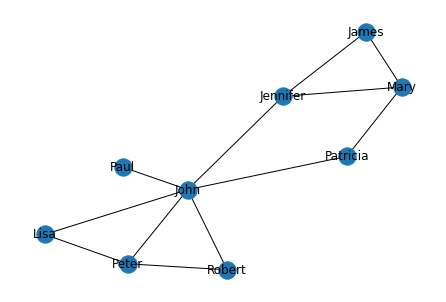

In [57]:
nx.draw(G, with_labels=True)

### Degree centrality

The degree centrality mesaure is the the number of neighbors of each node divided by the maximum number of neighbors that it could have. In an undirected graph, this is  where  is the total number of nodes of the graph.

In [59]:
dc = nx.degree_centrality(G)
print(dc)

{'James': 0.25, 'Mary': 0.375, 'Robert': 0.25, 'Patricia': 0.25, 'John': 0.75, 'Jennifer': 0.375, 'Lisa': 0.25, 'Peter': 0.375, 'Paul': 0.125}


## Betweenness centrality

Betweenness centrality of a node v is the sum of the fraction of all-pairs shortest paths that pass through v

In [60]:
bc = nx.betweenness_centrality(G)
print(bc)

{'James': 0.0, 'Mary': 0.05357142857142857, 'Robert': 0.0, 'Patricia': 0.08928571428571427, 'John': 0.7142857142857142, 'Jennifer': 0.26785714285714285, 'Lisa': 0.0, 'Peter': 0.017857142857142856, 'Paul': 0.0}


## Eigenvector Centrality

Eigenvector centrality assigns relative scores to all nodes in the network based on the concept that connections to high-scoring nodes contribute more to the score of the node in question than equal connections to low-scoring nodes.

In [63]:
ec = nx.eigenvector_centrality(G)

In [61]:
import pandas as pd
import seaborn as sns

In [65]:
centrality_measures = {
    'degree': dc,
    'betweenness': bc,
    'eigenvector': ec,
}
centrality = pd.DataFrame(centrality_measures)
centrality

,degree,betweenness,eigenvector
James,0.250,0.000000,0.188229
Mary,0.375,0.053571,0.253852
Robert,0.250,0.000000,0.312662
Patricia,0.250,0.089286,0.269109
John,0.750,0.714286,0.580613
Jennifer,0.375,0.267857,0.329813
Lisa,0.250,0.000000,0.312662
Peter,0.375,0.017857,0.388905
Paul,0.125,0.000000,0.187243


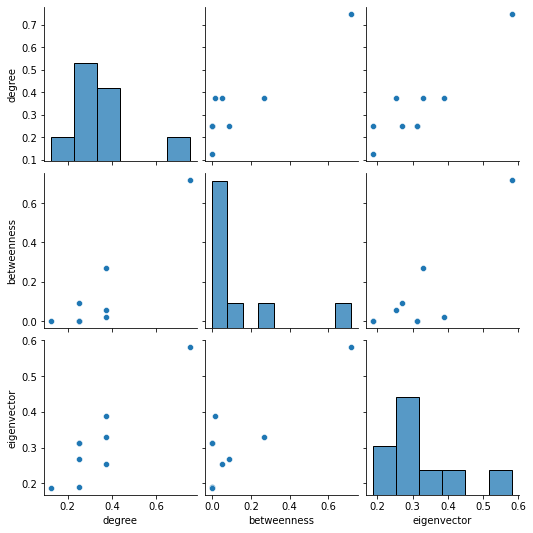

In [66]:
sns.pairplot(centrality)

## Exercise

In [67]:
F = nx.florentine_families_graph()

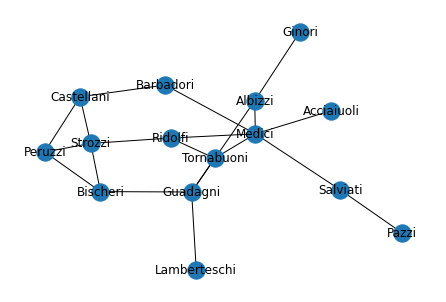

In [70]:
nx.draw(F, with_labels=True)

Analyze node centrality measures on the Florentine families graph and plot their relation.

In [ ]:
# degree

In [ ]:
# betweennes

In [ ]:
# eigenvector

In [ ]:
# plot

## Community detection

[['Patricia', 'Mary', 'James', 'Mark', 'Jennifer'], ['Peter', 'John', 'Paul', 'Lisa', 'Robert']]


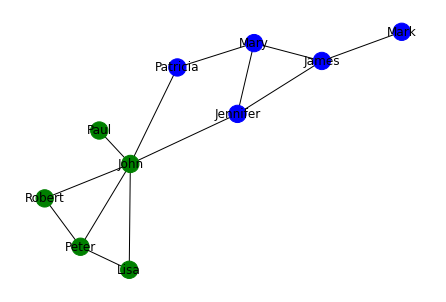

In [ ]:
communities = girvan_newman(G)
node_groups = []

for com in next(communities):
  node_groups.append(list(com))

print(node_groups)

color_map = []
for node in G:
    if node in node_groups[0]:
        color_map.append('blue')
    else: 
        color_map.append('green')  

nx.draw(G, node_color=color_map, with_labels=True)
plt.show()

## Exercise

Find communities in Zachary's karate club graph and plot them.

In [ ]:
K = nx.karate_club_graph()

## Here goes your community detection and plot

## Link prediction

In [ ]:
link_prediction = (list(nx.jaccard_coefficient(G)))
link_prediction.sort(key = lambda x: x[2], reverse=True)
print(link_prediction)

[('Robert', 'Lisa', 1.0), ('Patricia', 'Jennifer', 0.6666666666666666), ('Patricia', 'Robert', 0.3333333333333333), ('Patricia', 'Lisa', 0.3333333333333333), ('Mary', 'Mark', 0.3333333333333333), ('Mary', 'John', 0.3333333333333333), ('Jennifer', 'Mark', 0.3333333333333333), ('Peter', 'Patricia', 0.25), ('Patricia', 'James', 0.25), ('Jennifer', 'Lisa', 0.25), ('Jennifer', 'Robert', 0.25), ('Peter', 'Jennifer', 0.2), ('John', 'James', 0.14285714285714285), ('Peter', 'Mary', 0.0), ('Peter', 'James', 0.0), ('Peter', 'Mark', 0.0), ('Patricia', 'Mark', 0.0), ('Mary', 'Lisa', 0.0), ('Mary', 'Robert', 0.0), ('John', 'Mark', 0.0), ('Robert', 'Mark', 0.0), ('Robert', 'James', 0.0), ('Lisa', 'Mark', 0.0), ('Lisa', 'James', 0.0)]


In [ ]:
link_prediction = (list(nx.preferential_attachment(G)))
link_prediction.sort(key = lambda x: x[2], reverse=True)
print(link_prediction)

[('Mary', 'John', 15), ('John', 'James', 15), ('Peter', 'Mary', 9), ('Peter', 'James', 9), ('Peter', 'Jennifer', 9), ('Peter', 'Patricia', 6), ('Patricia', 'Jennifer', 6), ('Patricia', 'James', 6), ('Mary', 'Lisa', 6), ('Mary', 'Robert', 6), ('Jennifer', 'Lisa', 6), ('Jennifer', 'Robert', 6), ('Robert', 'James', 6), ('Lisa', 'James', 6), ('John', 'Mark', 5), ('Patricia', 'Robert', 4), ('Patricia', 'Lisa', 4), ('Robert', 'Lisa', 4), ('Peter', 'Mark', 3), ('Mary', 'Mark', 3), ('Jennifer', 'Mark', 3), ('Patricia', 'Mark', 2), ('Robert', 'Mark', 2), ('Lisa', 'Mark', 2)]


## What about tabular data?

In [84]:
!gdown "1yn_3PcH0P8Fmx_JC0ytvmwhUgpY3Pc__"

Downloading...
From: https://drive.google.com/uc?id=1yn_3PcH0P8Fmx_JC0ytvmwhUgpY3Pc__
To: /content/follow.txt
100% 8.28M/8.28M [00:00<00:00, 65.2MB/s]


In [85]:
with open('/content/follow.txt') as f:
    lines = f.readlines()

for l in lines[:5]:
  print(l)

source,target

1443621511424794625,7331

236430473,7331

253224110,7331

339638354,7331



In [86]:
df = pd.read_csv('/content/follow.txt', sep=",")

In [87]:
df.head()

,source,target
0,1443621511424794625,7331
1,236430473,7331
2,253224110,7331
3,339638354,7331
4,202845413,7331


In [88]:
G = nx.from_pandas_edgelist(df, source = 'source', target = 'target')

In [89]:
print("Number of nodes: {}".format(G.number_of_nodes()))
print("Number of edges: {}".format(G.number_of_edges()))

Number of nodes: 8550
Number of edges: 237832


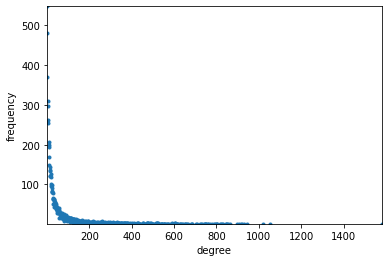

In [90]:
from collections import Counter
from operator import itemgetter

degrees = [G.degree(n) for n in G.nodes()]
degree_counts = Counter(degrees)   
x, y = zip(*degree_counts.items()) 

plt.xlabel('degree')                                                                                                             
# plt.xscale('log')                                                                                                                
plt.xlim(1, max(x))  
                                                                                                           
plt.ylabel('frequency')                                                                                                          
# plt.yscale('log')                                                                                                                
plt.ylim(1, max(y))                                                                                                             
                                                                                                                                     # do plot                                                                                                                        
plt.scatter(x, y, marker='.')                                                                                                    
plt.show()